### This jupyter notebook contains contents of the lesson "CNN algorithms for Face Detection"

**Author : Umidjon Sattorov. Machine Learning engineer**

A Convolutional Neural Network (CNN) is a type of deep learning model designed specifically for processing data with a grid-like structure, such as images.

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.vgg16 import VGG16

tf.keras.backend.clear_session()

| **Class Number** | **Label**  | **Description**                                   |
| ---------------- | ---------- | ------------------------------------------------- |
| 0                | airplane   | Airplanes, jets, helicopters (flying vehicles)    |
| 1                | automobile | Cars, trucks (but *no pickup trucks*)             |
| 2                | bird       | Birds of different kinds                          |
| 3                | cat        | Domestic cats                                     |
| 4                | deer       | Deer, elk, moose (hoofed mammals)                 |
| 5                | dog        | Dogs of different breeds                          |
| 6                | frog       | Frogs, toads                                      |
| 7                | horse      | Horses, ponies                                    |
| 8                | ship       | Ships, boats (including tankers, sailboats, etc.) |
| 9                | truck      | Trucks and lorries (includes pickup trucks here)  |


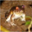

In [15]:
# Loading data of the images(CIFAR-10 class)
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

Image.fromarray(x_train[0])

In [3]:
y_train[0]

array([6], dtype=uint8)

In [4]:
# Normalization of features
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
# Defining CNN model for Image classification task
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  
])

# Compiling model
model.compile(optimizer = Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


c:\Users\user\Documents\Personal_Course\Course_1\Part_1_Introduction_To_Python\W_Numpy\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Training model
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

# 5. Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7319 - loss: 0.7647 - val_accuracy: 0.6897 - val_loss: 0.9058
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7496 - loss: 0.7140 - val_accuracy: 0.7051 - val_loss: 0.8435
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7650 - loss: 0.6709 - val_accuracy: 0.6997 - val_loss: 0.8911
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7800 - loss: 0.6289 - val_accuracy: 0.6938 - val_loss: 0.9199
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7926 - loss: 0.5904 - val_accuracy: 0.7195 - val_loss: 0.8450
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8045 - loss: 0.5562 - val_accuracy: 0.7172 - val_loss: 0.8634
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8163 - loss: 0.5217 - val_accuracy: 0.7169 - val_loss: 0.8620
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8268 - loss: 0.4923 - 

In [11]:
# Deeper convolutional layers
model_deep = models.Sequential([

    # Block 1
    layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Block 2
    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Block 3
    layers.Conv2D(128, (3,3), activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),

    # Dense layers
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

# Compiling model
model_deep.compile(optimizer = Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


c:\Users\user\Documents\Personal_Course\Course_1\Part_1_Introduction_To_Python\W_Numpy\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Training model
history = model_deep.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

# 5. Evaluate model
test_loss, test_acc = model_deep.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 30ms/step - accuracy: 0.4678 - loss: 1.5686 - val_accuracy: 0.5473 - val_loss: 1.3388
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 0.6443 - loss: 1.0118 - val_accuracy: 0.6836 - val_loss: 0.9444
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 0.7040 - loss: 0.8516 - val_accuracy: 0.7340 - val_loss: 0.7708
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.7372 - loss: 0.7563 - val_accuracy: 0.7458 - val_loss: 0.7474
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.7615 - loss: 0.6938 - val_accuracy: 0.7658 - val_loss: 0.6778
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.7847 - loss: 0.6319 - val_accuracy: 0.7928 - val_loss: 0.6155
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.7977 - loss: 0.5855 - val_accuracy: 0.7849 - val_loss: 0.6231
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 37ms/step - accuracy: 0.8085 -

___

In [14]:
# Back to original size, denormalization
x_train_origin, x_test_origin = (x_train * 255.0).astype('uint8'), (x_test * 255.0).astype('uint8')

In [ ]:
%pip install opencv-python

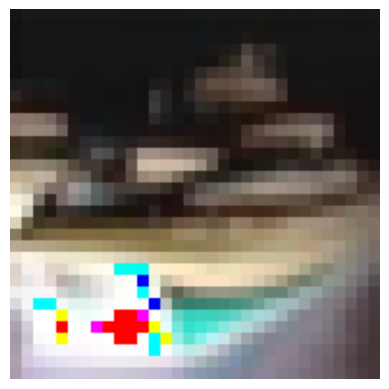

In [ ]:
img_resized = cv2.resize(x_test_origin[1], (128,128), interpolation = cv2.INTER_NEAREST)
plt.imshow(img_resized)
plt.axis("off")
plt.show()

In [ ]:
# Checking the performance of the model
np.argmax(model_deep.predict(x_test[0].reshape(1, 32, 32, 3)))

NameError: name 'model_deep' is not defined

___

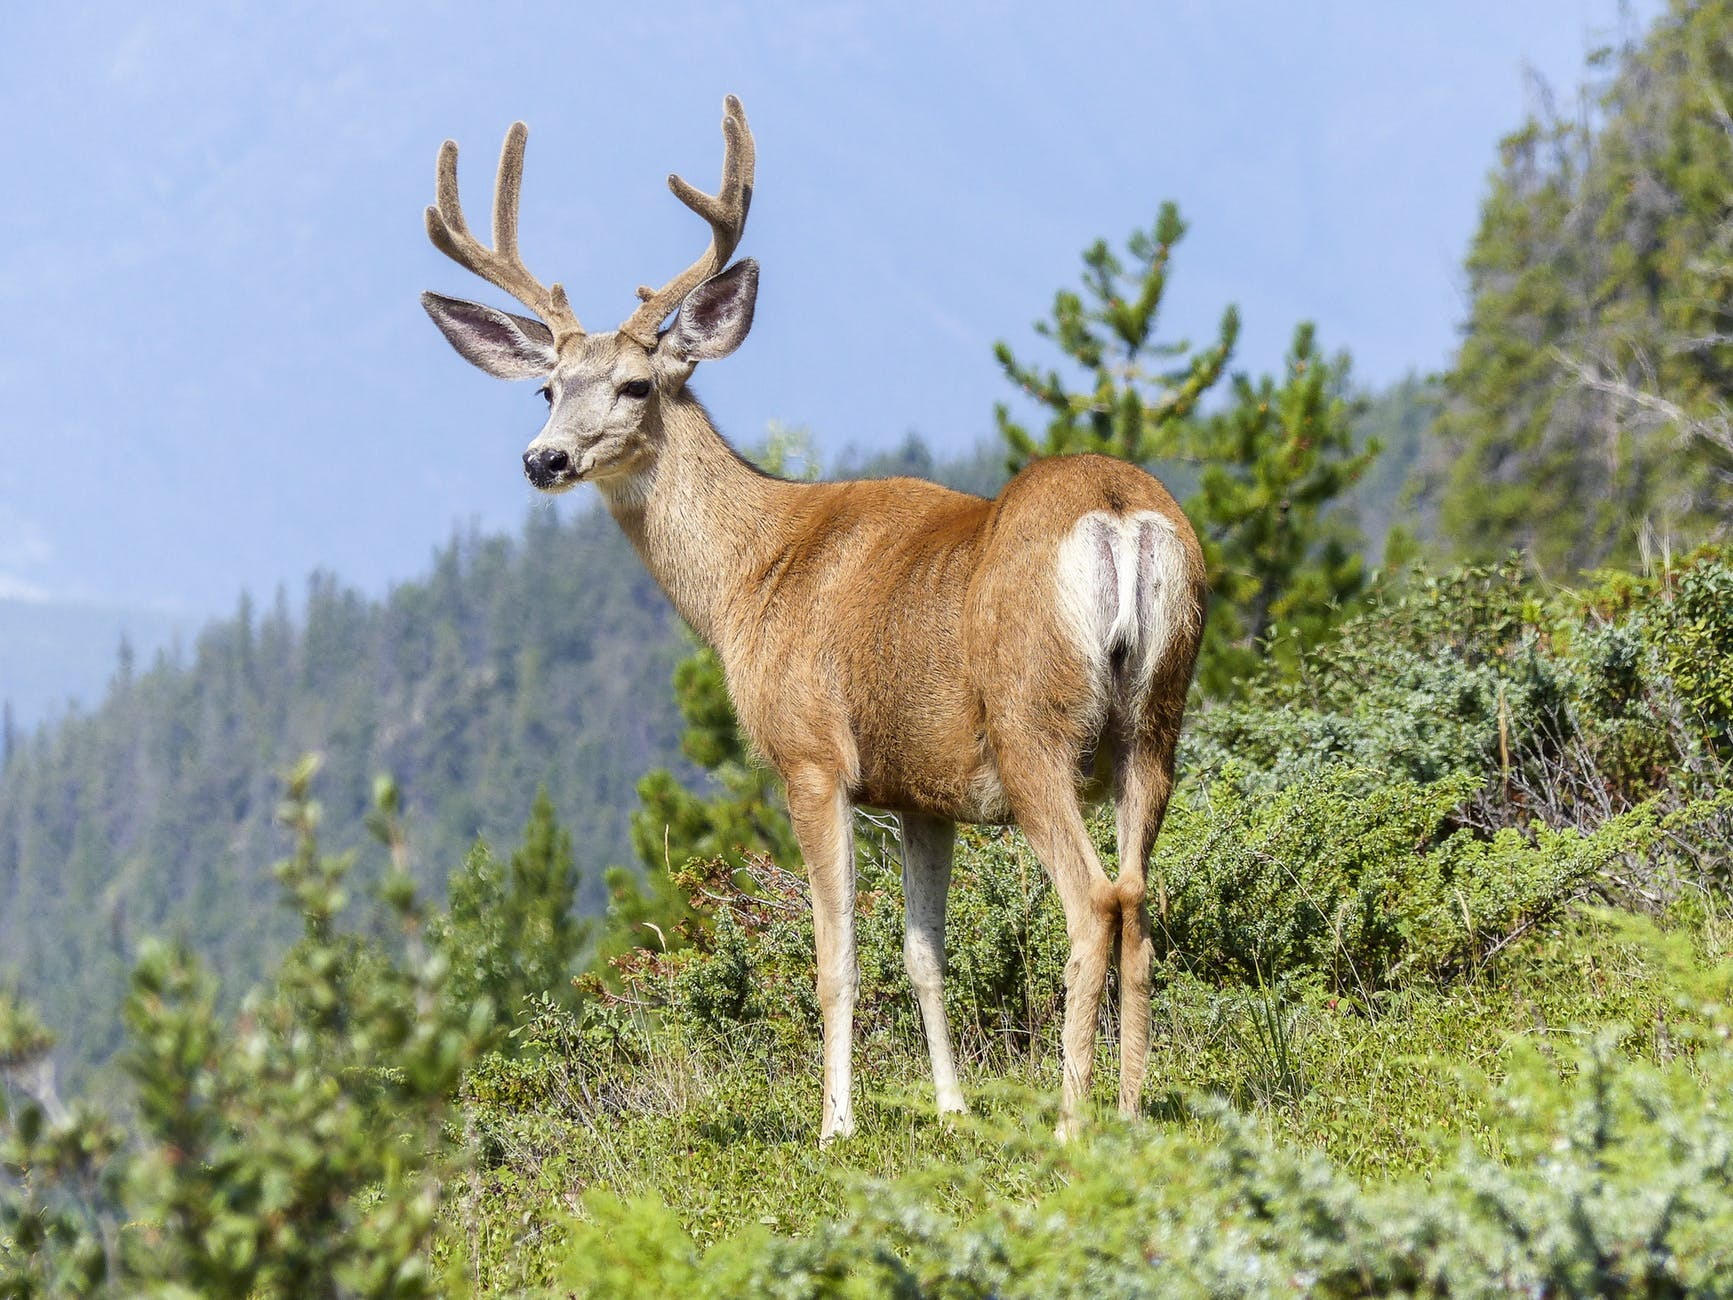

In [20]:
Image.open('./deer.jpg')

In [21]:
# Checking model performance with internet data
img_deer = np.array(Image.open('./deer.jpg'))
img_resized = tf.image.resize(img_deer, (32, 32))
img_resized = img_resized / 255.0
img_ready = np.expand_dims(img_resized, axis=0)

np.argmax(model_deep.predict(img_ready))

NameError: name 'model_deep' is not defined

___

### Using pretrained models

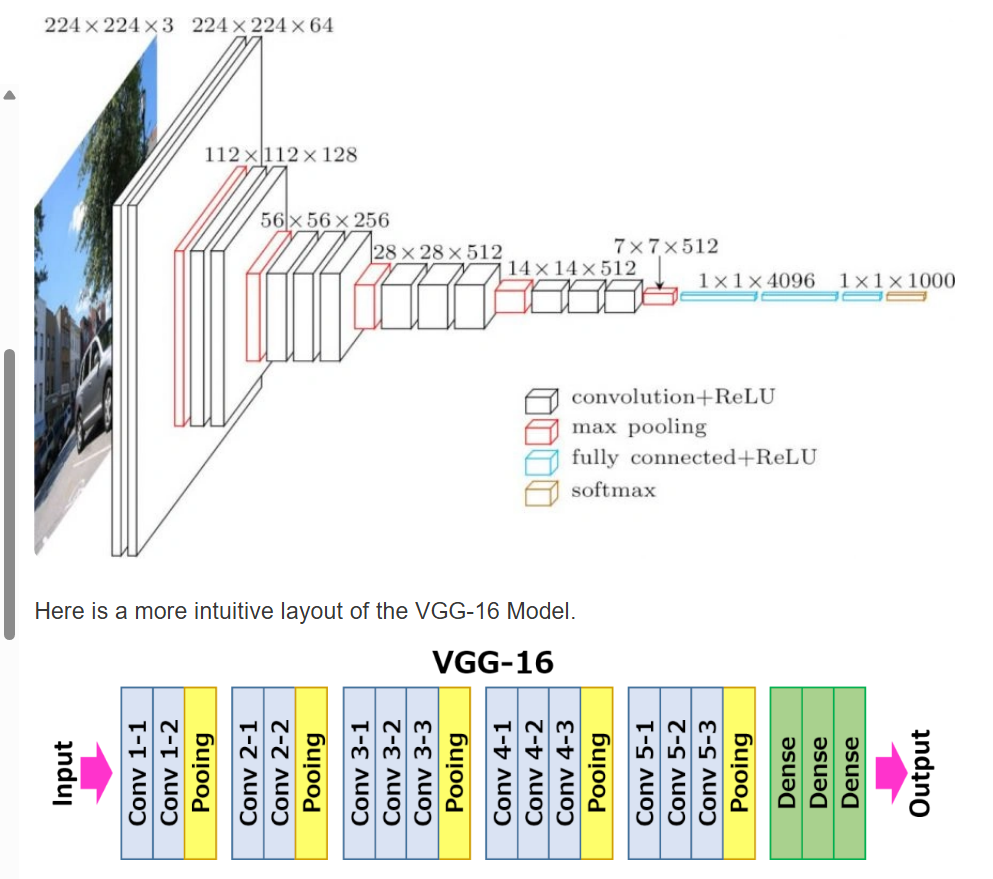

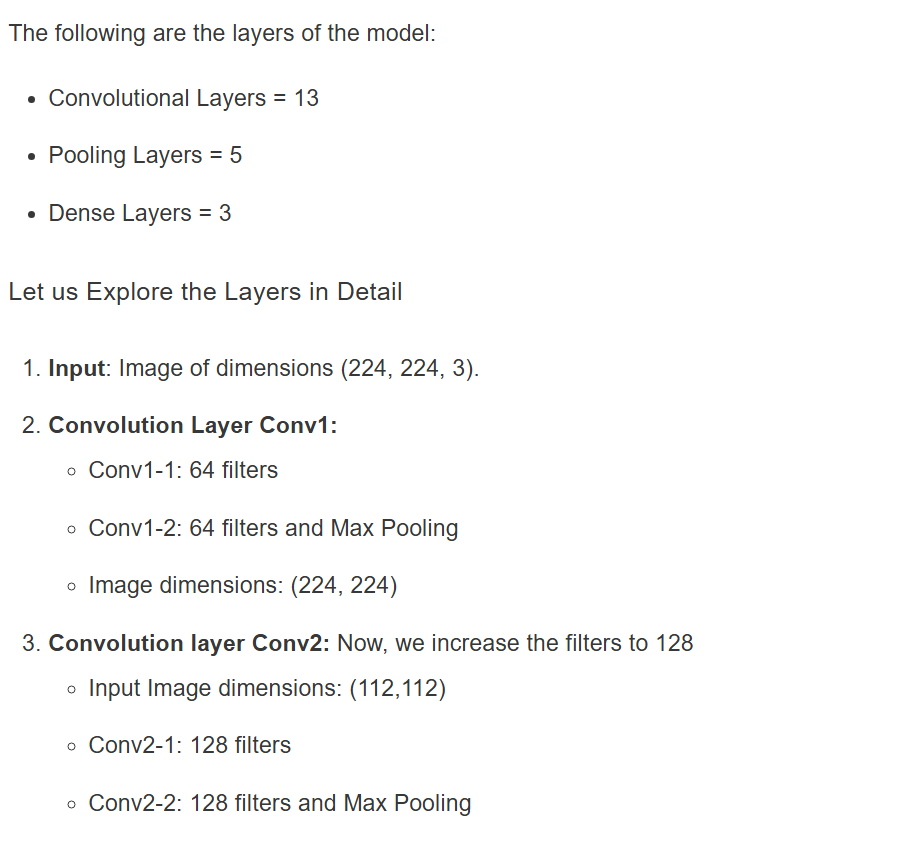

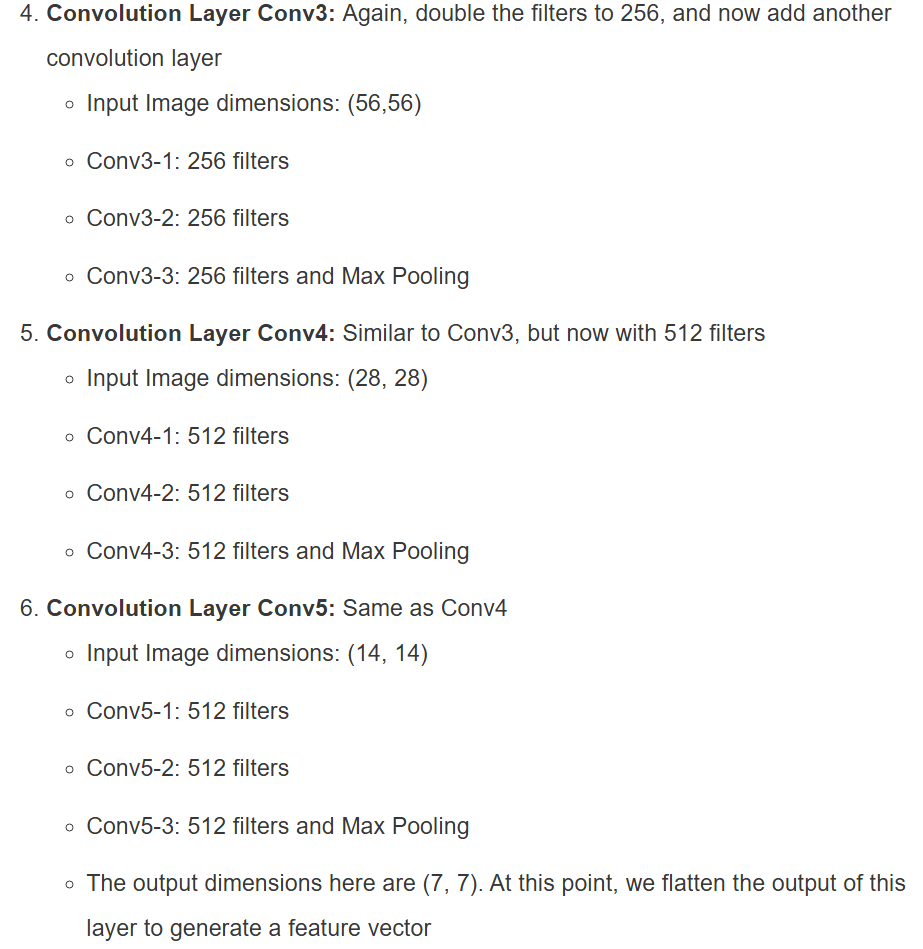

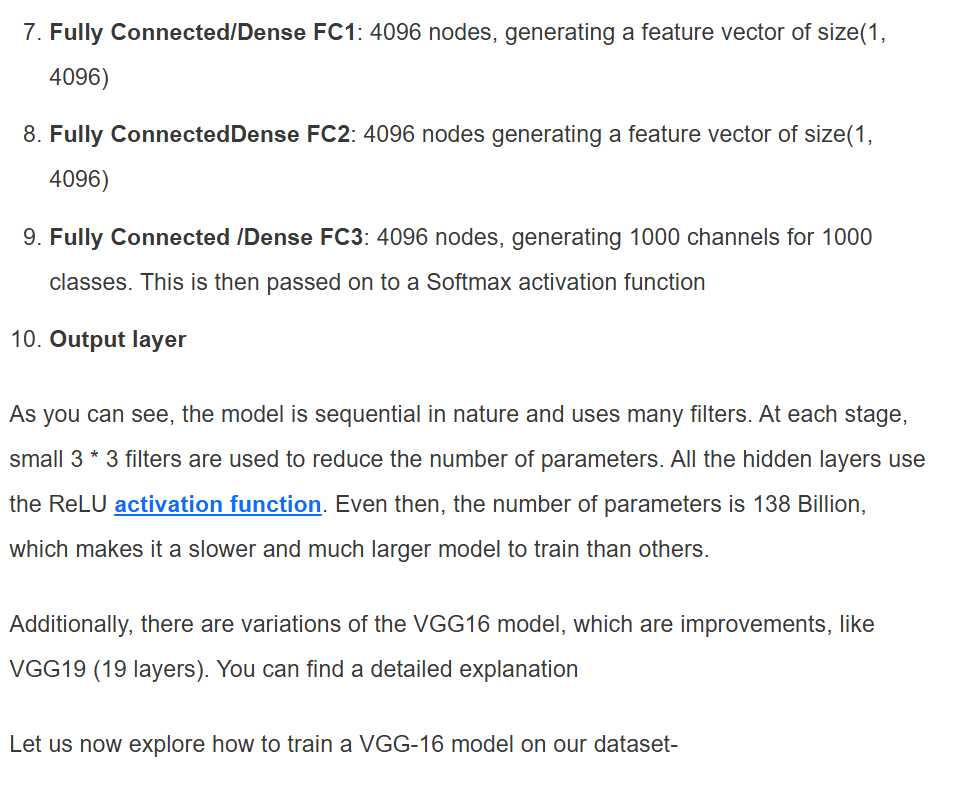

In [9]:
# Loading pretrained model
vgg16_model = VGG16(
    input_shape = (32, 32, 3),
    include_top = False,
    weights = None
)

for layer in vgg16_model.layers :
    layer.trainable = False

In [10]:
# Adding additional layers for prediction
x = layers.Flatten()(vgg16_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(10, activation='softmax')(x)

model = tf.keras.models.Model(vgg16_model.input, x)

model.compile(optimizer = Adam(), loss = 'sparse_categorical_crossentropy',metrics = ['acc'])

In [17]:
# Resize images to 224x224 using OpenCV
def resize_images(images):
    resized = [cv2.resize(img, (224, 224), interpolation=cv2.INTER_LINEAR) for img in images]
    return np.array(resized)

# Resizing image from the function
x_train_resized = resize_images(x_train_origin)
x_test_resized = resize_images(x_test_origin)

# Normalize to [0,1]
x_train_resized = x_train_resized.astype("float32") / 255.0
x_test_resized = x_test_resized.astype("float32") / 255.0

NameError: name 'x_train_origin' is not defined

In [ ]:
# Training models
vgghist = model.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size = 64, epochs = 100, verbose = 1)

Epoch 1/100


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None, 10, 10), output.shape=(None, 10)

____

In [5]:
# Using MobileNetV2 model for pretrained models
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

# Freeze the convolutional base
# for layer in base_model.layers:
#     layer.trainable = False 
# for layer in base_model.layers[-40 : ]:
#     layer.trainable = True


# Add a custom classification head
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dropout(0.5)(x)
output = layers.Dense(10, activation="softmax")(x)

model = models.Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(learning_rate = 1e-3),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

C:\Users\User\AppData\Local\Temp\ipykernel_10664\2250808044.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 17s 2us/step


In [7]:
# One-hot encode labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [18]:
# Training model to see the performance
history = model.fit(x_train, y_train,
                    validation_data = (x_test, y_test),
                    batch_size = 64, epochs = 10, verbose = 1)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1622s 2s/step - acc: 0.1626 - loss: 2.2226 - val_acc: 0.2379 - val_loss: 2.1210
Epoch 2/10
 19/782 ━━━━━━━━━━━━━━━━━━━━ 18:48 1s/step - acc: 0.1925 - loss: 2.1470

KeyboardInterrupt: 